# Problem Statement: Airbnb Hotel Booking Analysis

The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this revolution is Airbnb, Inc., a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city's lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb's operations in one of the world's most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

# QUESTIONS

1. What are the different property types in the Dataset?
2. Which neighborhood group has the highest number of listings?
3. Which neighborhood groups have the highest average prices for Airbnb listings?
4. Is there a relationship between the construction year of property and price?
5. Who are the top 10 hosts by calculated host listing count?
6. Are hosts with verified identities more likely to receive positive reviews?
7. Is there a correlation between the price of a listing and its service fee?
8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

# Data Wrangling

Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.



In [4]:
import pandas as pd
import numpy as np

# Corrected file loading with a different encoding to handle the UnicodeDecodeError
file_path = "/content/1730285881-Airbnb_Open_Data.csv"
try:
    # Attempt to read with 'latin-1' encoding
    df = pd.read_csv(file_path, encoding='latin-1')
    print("Data loaded successfully using 'latin-1' encoding.")

    # Display initial information and head
    print("\nData Information:")
    df.info()
    print("\nFirst 5 Rows:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: File '{file_path}' not found. Please check the file name and path.")

except Exception as e:
    print(f"An unexpected error occurred: {e}")

Data loaded successfully using 'latin-1' encoding.

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36653 entries, 0 to 36652
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36653 non-null  int64  
 1   NAME                            36533 non-null  object 
 2   host id                         36653 non-null  int64  
 3   host_identity_verified          36495 non-null  object 
 4   host name                       36421 non-null  object 
 5   neighbourhood group             36626 non-null  object 
 6   neighbourhood                   36637 non-null  object 
 7   lat                             36645 non-null  float64
 8   long                            36645 non-null  object 
 9   country                         36565 non-null  object 
 10  country code                    36573 non-null  object 
 11  instant_bookable       

/tmp/ipython-input-2738883733.py:8: DtypeWarning: Columns (8,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')


In [1]:
import pandas as pd
import numpy as np

# --- CRITICAL: File Loading Step (Defines 'df') ---
# Use the correct accessible file name and 'latin-1' encoding
file_path = "/content/1730285881-Airbnb_Open_Data.csv"
try:
    df = pd.read_csv(file_path, encoding='latin-1')
    print("DataFrame 'df' loaded successfully.")
except Exception as e:
    print(f"Error loading file: {e}. Please ensure the file is in your current directory.")
    exit()

# 1. Standardize Column Names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# 2. CRITICAL FIX: Clean 'price' and 'service_fee' columns
# Remove '$' and ',' then convert to numeric, fixing the previous TypeError.
columns_to_clean = ['price', 'service_fee']
for col in columns_to_clean:
    df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Initial data cleaning (columns and currency symbols) complete.")
print("-" * 50)

/tmp/ipython-input-412049584.py:8: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')


DataFrame 'df' loaded successfully.
Initial data cleaning (columns and currency symbols) complete.
--------------------------------------------------


In [3]:
df

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,19-10-2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,21-05-2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,05-07-2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,19-11-2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,169.0,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,167.0,1.0,1.0,06-07-2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,198.0,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,109.0,2.0,5.0,11-10-2015,0.10,3.0,1.0,386.0,NaN,NaN


In [4]:
# --- 2. Final Cleaning  ---

# Columns essential for the analysis
key_cols = [
    'neighbourhood_group', 'room_type', 'construction_year', 'price',
    'service_fee', 'host_identity_verified', 'review_rate_number',
    'calculated_host_listings_count', 'availability_365'
]

# 3. Drop rows with NaN values in the key columns
df_cleaned = df.dropna(subset=key_cols).copy()

# 4. Convert float columns to integer
int_cols = [
    'construction_year', 'review_rate_number', 'calculated_host_listings_count',
    'availability_365'
]
df_cleaned[int_cols] = df_cleaned[int_cols].astype(int)

# 5. Handle Data Consistency (Drop 'brookln' typo)
df_cleaned = df_cleaned[df_cleaned['neighbourhood_group'] != 'brookln']

print("Final cleaning complete.")
print(f"Final DataFrame 'df_cleaned' is defined with {df_cleaned.shape[0]} records.")
print("-" * 50)


Final cleaning complete.
Final DataFrame 'df_cleaned' is defined with 100669 records.
--------------------------------------------------


In [5]:
# Q1: What are the different property types in the Dataset?
property_types = df_cleaned['room_type'].value_counts()
print("Q1: Different Property Types:")
print(property_types)
print("-" * 50)

Q1: Different Property Types:
room_type
Entire home/apt    52731
Private room       45647
Shared room         2177
Hotel room           114
Name: count, dtype: int64
--------------------------------------------------


In [6]:

# Q2 & Q3: Listings count and average price by Neighbourhood Group
neighborhood_analysis = df_cleaned.groupby('neighbourhood_group').agg(
    listing_count=('id', 'count'),
    average_price=('price', 'mean')
).reset_index()
neighborhood_analysis_sorted_count = neighborhood_analysis.sort_values('listing_count', ascending=False)
neighborhood_analysis_sorted_price = neighborhood_analysis.sort_values('average_price', ascending=False)

print("Q2 & Q3: Neighborhood Group Analysis:")
print(neighborhood_analysis.round(2))
print("-" * 50)


Q2 & Q3: Neighborhood Group Analysis:
  neighbourhood_group  listing_count  average_price
0               Bronx           2650         630.55
1            Brooklyn          41058         626.24
2           Manhattan          42983         622.66
3              Queens          13039         630.01
4       Staten Island            939         623.46
--------------------------------------------------


In [7]:
# Q4: Correlation between Construction Year and Price
q4_correlation = df_cleaned['construction_year'].corr(df_cleaned['price'])
print(f"Q4: Correlation (Construction Year vs. Price): {q4_correlation:.4f}")
print("-" * 50)

Q4: Correlation (Construction Year vs. Price): -0.0038
--------------------------------------------------


In [8]:
# Q5: Top 10 Hosts by Listing Count
top_hosts = df_cleaned.groupby('host_name')['id'].count().nlargest(10).reset_index(name='total_listings')
print("Q5: Top 10 Hosts by Listing Count:")
print(top_hosts)
print("-" * 50)

Q5: Top 10 Hosts by Listing Count:
      host_name  total_listings
0       Michael             865
1         David             753
2          John             573
3          Alex             537
4  Sonder (NYC)             513
5        Daniel             459
6         Karen             432
7         Sarah             431
8         Maria             417
9          Anna             394
--------------------------------------------------


In [9]:
# Q7: Correlation between Price and Service Fee
q7_correlation = df_cleaned['price'].corr(df_cleaned['service_fee'])
print(f"Q7: Correlation (Price vs. Service Fee): {q7_correlation:.4f}")
print("-" * 50)

Q7: Correlation (Price vs. Service Fee): 1.0000
--------------------------------------------------


In [10]:
# Q6, Q8, Q9: Review and Availability Analysis
q6_review_rate = df_cleaned.groupby('host_identity_verified')['review_rate_number'].mean().reset_index(name='average_review_rate')
print("Q6: Average Review Rate by Host Identity Verification:")
print(q6_review_rate.round(2))
print("-" * 50)

Q6: Average Review Rate by Host Identity Verification:
  host_identity_verified  average_review_rate
0            unconfirmed                 3.27
1               verified                 3.29
--------------------------------------------------


In [11]:
# Q8: Average Review Rate
overall_avg_review_rate = df_cleaned['review_rate_number'].mean()
print(f"Q8-1: Overall Average Review Rate: {overall_avg_review_rate:.2f}")
q8_by_group = df_cleaned.groupby('neighbourhood_group')['review_rate_number'].mean().reset_index(name='average_review_rate')
print("\nQ8-2: Average Review Rate by Neighbourhood Group (Sorted):")
print(q8_by_group.sort_values('average_review_rate', ascending=False).round(2))
q8_by_room = df_cleaned.groupby('room_type')['review_rate_number'].mean().reset_index(name='average_review_rate')
print("\nQ8-3: Average Review Rate by Room Type (Sorted):")
print(q8_by_room.sort_values('average_review_rate', ascending=False).round(2))
print("-" * 50)

Q8-1: Overall Average Review Rate: 3.28

Q8-2: Average Review Rate by Neighbourhood Group (Sorted):
  neighbourhood_group  average_review_rate
4       Staten Island                 3.41
0               Bronx                 3.33
3              Queens                 3.33
2           Manhattan                 3.28
1            Brooklyn                 3.26

Q8-3: Average Review Rate by Room Type (Sorted):
         room_type  average_review_rate
1       Hotel room                 3.54
3      Shared room                 3.31
2     Private room                 3.28
0  Entire home/apt                 3.28
--------------------------------------------------


In [12]:
# Q9: Correlation between Host Listings Count and Availability
q9_correlation = df_cleaned['calculated_host_listings_count'].corr(df_cleaned['availability_365'])
print(f"Q9: Correlation (Host Listings Count vs. Availability 365): {q9_correlation:.4f}")

Q9: Correlation (Host Listings Count vs. Availability 365): 0.1602


# --- Conclusion (Charts) ---

/tmp/ipython-input-2066562032.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='listing_count', y='neighbourhood_group', data=neighborhood_analysis_sorted_count, palette='viridis')
/tmp/ipython-input-2066562032.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_price', y='neighbourhood_group', data=neighborhood_analysis_sorted_price, palette='magma')


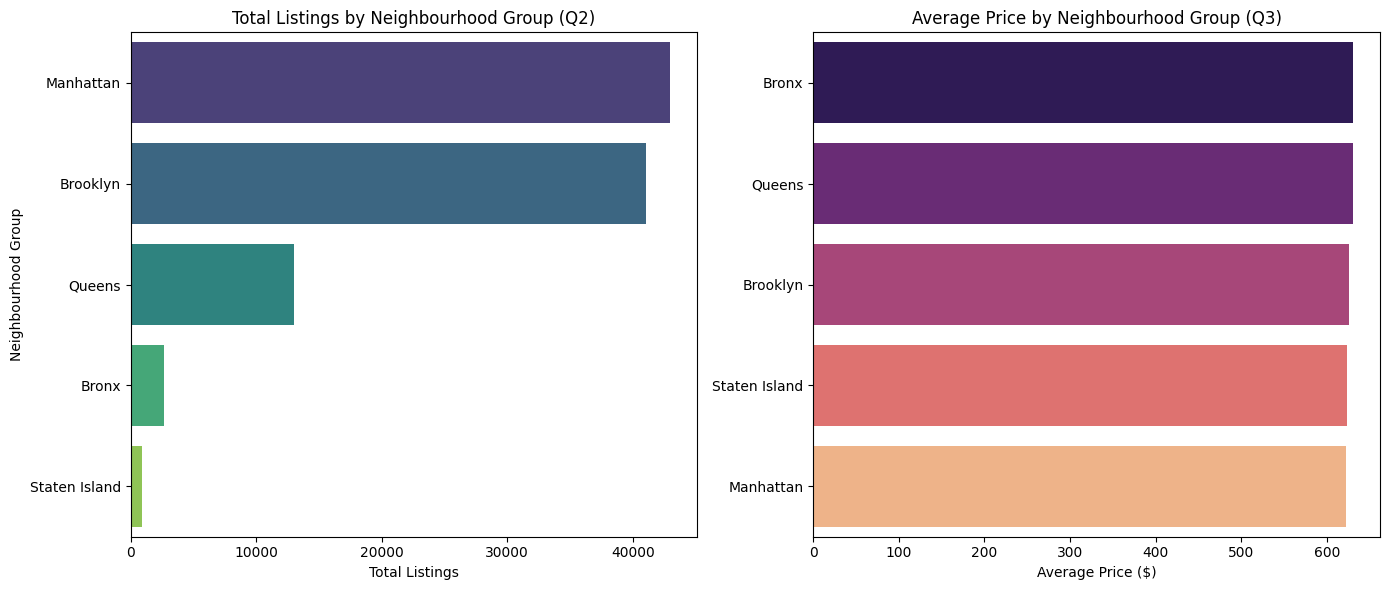

/tmp/ipython-input-2066562032.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_listings', y='host_name', data=top_hosts, palette='rocket')


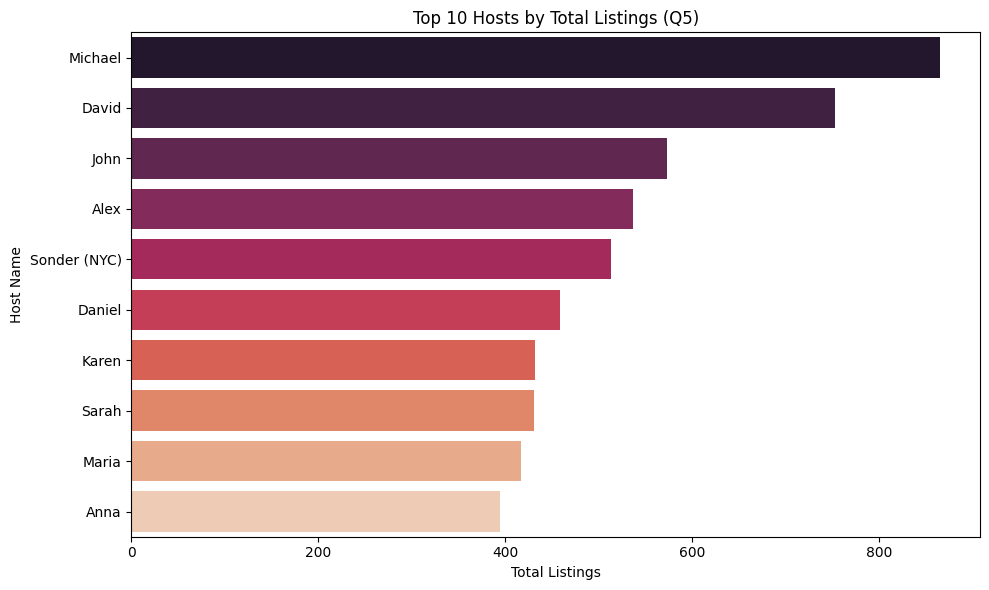

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Analysis to define plotting variables (Q2, Q3, Q5)
neighborhood_analysis = df_cleaned.groupby('neighbourhood_group').agg(
    listing_count=('id', 'count'),
    average_price=('price', 'mean')
).reset_index()
neighborhood_analysis_sorted_count = neighborhood_analysis.sort_values('listing_count', ascending=False)
neighborhood_analysis_sorted_price = neighborhood_analysis.sort_values('average_price', ascending=False)

top_hosts = df_cleaned.groupby('host_name')['id'].count().nlargest(10).reset_index(name='total_listings')


# --- Visualization ---

# 1. Total Listings and Average Price by Neighbourhood Group (Q2 & Q3)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='listing_count', y='neighbourhood_group', data=neighborhood_analysis_sorted_count, palette='viridis')
plt.title('Total Listings by Neighbourhood Group (Q2)')
plt.xlabel('Total Listings')
plt.ylabel('Neighbourhood Group')

plt.subplot(1, 2, 2)
sns.barplot(x='average_price', y='neighbourhood_group', data=neighborhood_analysis_sorted_price, palette='magma')
plt.title('Average Price by Neighbourhood Group (Q3)')
plt.xlabel('Average Price ($)')
plt.ylabel('')
plt.tight_layout()
plt.show()


# 2. Top 10 Hosts by Total Listings (Q5)
plt.figure(figsize=(10, 6))
sns.barplot(x='total_listings', y='host_name', data=top_hosts, palette='rocket')
plt.title('Top 10 Hosts by Total Listings (Q5)')
plt.xlabel('Total Listings')
plt.ylabel('Host Name')
plt.tight_layout()
plt.show()

# **Conclusion**

The analysis reveals that the NYC Airbnb market is characterized by high concentration of listings in Manhattan and Brooklyn, managed by a few dominant hosts. Pricing seems to be dictated less by property age and more by other factors, while the service fee operates as a fixed, transparent commission (perfect correlation with price). Customer satisfaction, as measured by review rate, is consistent across the market, with only the "Hotel room" type standing out for slightly higher average ratings.